# Introduction to Constrained Continuous Optimization

```{admonition} Learning outcomes
After reading this note, you will be able to:
- Define optimality conditions for constrained problems
- Model and solve linear optimization problems
- Model and solve non-linear optimization problems
```

<!-- 
Constrained opt

Taylor 1st order 
https://mathinsight.org/dot_product


Constraints, polytopes, QLP illustration

LP

https://en.wikipedia.org/wiki/Lagrange_multiplier#Examples

https://github.com/mechmotum/cyipopt/blob/master/examples/hs071_scipy_jax.py

Solvers (cvxpy, ipopt)
 -->

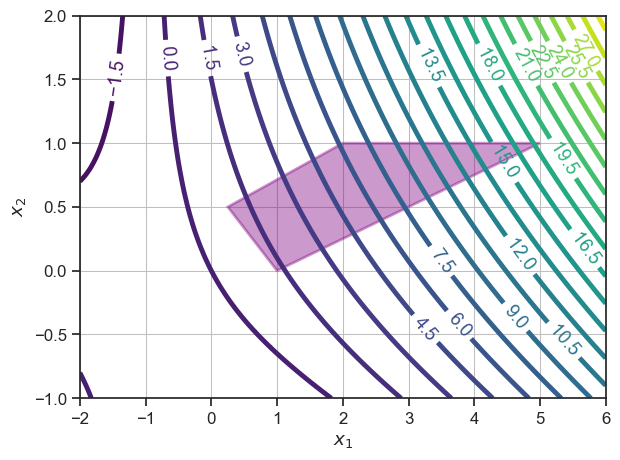

In [5]:
from sympy import * #Symbol, symbols, sin, cos, Polygon, solve, lambdify, Rational, pi, N
from sympy.plotting import plot
from spb import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# sns.plotting_context("notebook")
sns.set_theme()
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 3.5})
sns.set_style("white")
sns.set_style("ticks")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
# ax.set_axis_off()

# x = MatrixSymbol('x', 2, 1)
# line1 = x[0,0]+x[1,0]
# p1 = plot_contour(line1,  is_filled=False, fig=fig, ax=ax)
x1, x2 = symbols('x1 x2')
line1 = x1 + x2
quadratic1 = x1*x2 + 0.3*x1**2 + line1
# convex_function1 = x1*log(x2)
# objective_contour = plot_contour(line1,  (x1, -2, 6), (x2, -1, 2), {"levels": 20}, is_filled=False, show=False, legend=False, fig=fig, ax=ax)
objective_contour = plot_contour(quadratic1,  (x1, -2, 6), (x2, -1, 2), {"levels": 25}, is_filled=False, show=False, legend=False, fig=fig, ax=ax)

pt1, pt2, pt3, pt4, pt5 = [(0.25, 0.5), (1, 0), (5, 1), (0, 1), (2, 1)]
polytope = plot_geometry(Polygon(pt1, pt2, pt3, pt4, pt5), dict(color="purple", linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=True, show=False, fig=fig, ax=ax)

objective_contour.append(polytope[0])
objective_contour.show()

# # can use this to plot points: https://sympy-plot-backends.readthedocs.io/en/v2.2.0/modules/functions.html#spb.functions.plot_list

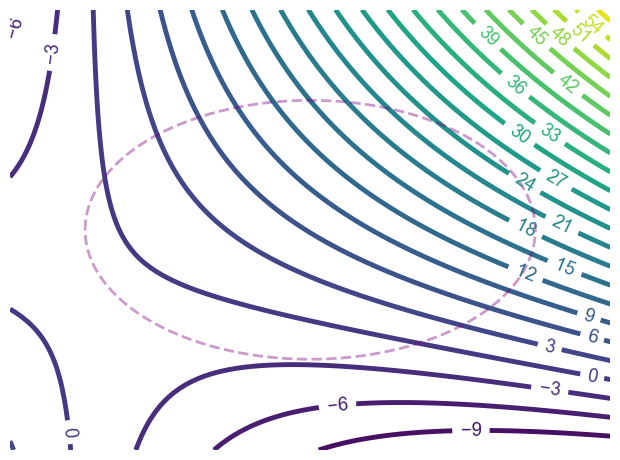

In [6]:
fig, ax = plt.subplots()
ax.set_axis_off()

# x = MatrixSymbol('x', 2, 1)
# line1 = x[0,0]+x[1,0]
# p1 = plot_contour(line1,  is_filled=False, fig=fig, ax=ax)
x1, x2 = symbols('x1 x2')
line1 = x1 + x2
quadratic1 = x1*x2 + 0.3*x1**2 + line1
# convex_function1 = x1*log(x2)
# objective_contour = plot_contour(line1,  (x1, -2, 6), (x2, -1, 2), {"levels": 20}, is_filled=False, show=False, legend=False, fig=fig, ax=ax)
objective_contour = plot_contour(quadratic1,  (x1, -2, 6), (x2, -4, 6), {"levels": 25}, is_filled=False, show=False, legend=False, fig=fig, ax=ax)

# pt1, pt2, pt3, pt4, pt5 = [(0.25, 0.5), (1, 0), (5, 1), (0, 1), (2, 1)]
# polytope = plot_geometry(Polygon(pt1, pt2, pt3, pt4, pt5), dict(color="purple", linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=True, show=False, fig=fig, ax=ax)
polytope = plot_geometry(Ellipse(Point(2, 1), hradius=3, eccentricity=Rational(1, 5)), dict(color="purple", linestyle='--', linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=False, show=False, fig=fig, ax=ax)

objective_contour.append(polytope[0])
objective_contour.show()


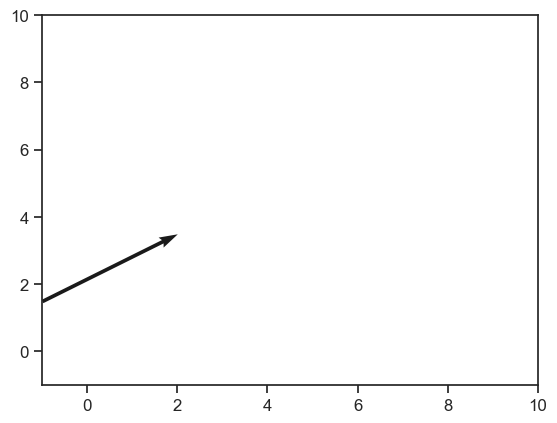

In [7]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[-1, 1.5, 3, 2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()
